Dataset: 100k medical no-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href = "#q1">What factors contribute to the prediction of a patient's attendance? (Gender, Diabetes, Handcap, Hypertension & Alcholism)</li> </a>
        <a href = "#q2"><li>In what way does age play into these rates?</li></a>
        <a href = "#q3"><li> Will the presence of alerts such as an sms make people more likely to show up? </li> </a>
        <a href = "#q4"><li> Are people from certain neigbourhoods more likely to show up?</li></a>
        <a href = "#q5"><li> Are scholarship holders less likely to miss their appointments? </li></a>
        <a href = "#q6"><li> Will patients be more encouraged to show up if their appointment day is on the same day as the schedule day? </li></a>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import copy
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [147]:
# Loading data and printing out a few lines
data = pd.read_csv("E:\\python for data science course\\AIPND-master\\appointments_data.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


** I'll be investigating the data to understand it's structure and figure out what changes should be made **

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Schedule Day & Appointment day should be convert to datetime objects for a more appropriate usage
- Neighbourhood data should be converted to titles instead of all-caps
- Typo in No-show column


In [149]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,39200.0,4.172615e+12,3.173180e+13,9.439170e+13,9.999820e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5030230.0,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.0,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


- The values of the last 6 rows are insignificant in this premise as they're mainly 0 or 1 in the actual data. So it's advisable to ignore them in this context 
- It's apparent that the minimum age is -1 which isn't correct, this needs to be tackled
- The values of the Handcap column maybe invalid
- There's also the presence of an outlier in the age column (maximum age is 115), which can affect the result

### Data Cleaning

In [150]:
# checking to see which values of Age have -1 as a value 
data["Age"].value_counts()
#only one element has a value of -1

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [151]:
data.query('Age == -1')

#only one row needs to be removed

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [152]:
#dropping this row
data.drop(data[data['Age'] == -1].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x184932f5d30>,
 'caps': [<matplotlib.lines.Line2D at 0x18493301310>,
 'boxes': [<matplotlib.lines.Line2D at 0x184932f5a60>],
 'medians': [<matplotlib.lines.Line2D at 0x184933018b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18493301b80>],
 'means': []}

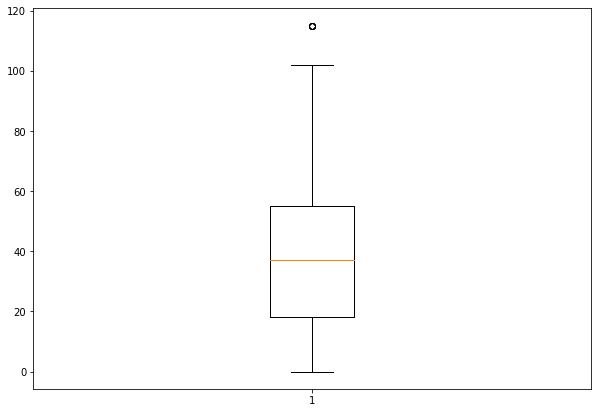

In [153]:
# visualizing the outliers in age
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['Age'])

>It is clear that there's an outlier

In [154]:
# dropping the outlier
data.drop(data[data['Age'] == 115].index, inplace=True)

In [155]:
#checking to see if there are duplicates
data.duplicated().any()

#no duplicates are found in this dataset

False

In [156]:
#checking for missing data
data.isnull().any()

#no missing data in this dataset

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [157]:
# correcting the no-show type
data.rename(columns={"No-show" : "no_show"}, inplace=True)
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [158]:
# Now in our analysis, patient ID and Appointment number columns are irrelevant
# it's valid to drop them

data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [159]:
# converting schedule day from object to datetime object
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])

In [160]:
# converting appointment day from object to datetime object
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

In [161]:
# since the time data in the time-stamps aren't provided in schedule day & appointment day, it's best if we remove 
# all the time data in both columns since they have to be synchronized
data["ScheduledDay"] = data["ScheduledDay"].dt.date
data["AppointmentDay"] = data["AppointmentDay"].dt.date

In [162]:
# checking to see if there's a scheduled day whose date is after the appointment date
invalid = data[data["ScheduledDay"] > data["AppointmentDay"]]
invalid

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [163]:
# we have several rows in this case which need to be removed, as it doesn't make sense to schedule an appointment after the
# actual appointment (and that's evident since all of them didn't show up to their appointments)
data.drop(invalid.index, axis=0, inplace=True)

In [164]:
# checking the validity of the Handcap data
data["Handcap"].value_counts()

# Since the handcap values are meant to be either true or false, any number bigger than 1 is invalid 

0    108281
1      2036
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [165]:
# it's best if we remove those rows
data.drop(data[data["Handcap"] > 1].index, inplace=True)

In [166]:
data["Handcap"].value_counts()

0    108281
1      2036
Name: Handcap, dtype: int64

In [167]:
#capitalizing neighbourhoods' names
data["Neighbourhood"] = data["Neighbourhood"].str.capitalize()

-----Post Cleaning------

In [168]:
data.shape

(110317, 12)

>###### We have 110322 rows and 12 columns

In [169]:
data.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29,2016-04-29,62,Jardim da penha,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,Jardim da penha,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,Mata da praia,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,Pontal de camburi,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,Jardim da penha,0,1,1,0,0,0,No


In [170]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,110317.0,37.067388,23.092474,0.0,18.0,37.0,55.0,102.0
Scholarship,110317.0,0.098289,0.297707,0.0,0.0,0.0,0.0,1.0
Hipertension,110317.0,0.196842,0.397614,0.0,0.0,0.0,0.0,1.0
Diabetes,110317.0,0.071612,0.257845,0.0,0.0,0.0,0.0,1.0
Alcoholism,110317.0,0.030385,0.171645,0.0,0.0,0.0,0.0,1.0
Handcap,110317.0,0.018456,0.134594,0.0,0.0,0.0,0.0,1.0
SMS_received,110317.0,0.321202,0.466940,0.0,0.0,0.0,1.0,1.0


Initial conclusions:
- The majority of ages fall between 18 and 55 years old
- Each patient recieves a maximum of 1 sms for his/her appointment

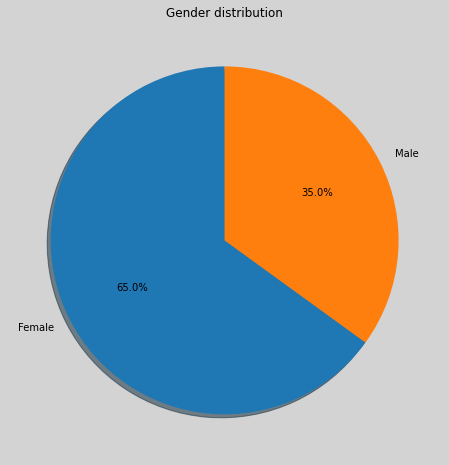

In [171]:
#displaying the distribution of both genders in the dataset
female_count = data["Gender"].value_counts()[0]
male_count = data["Gender"].value_counts()[1]

# # Create a list of the data
sizes = [female_count, male_count]
labels = ['Female', 'Male']

# # Plot the pie chart
fig, axes = plt.subplots(figsize=(10,8))
fig.set_facecolor('lightgrey')
axes.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)

# # Add a title
plt.title("Gender distribution")

# # Display the plot
plt.show()  


>The number of females in this dataset is higher than that of the males by 30%. 
Therefore, females dominate this dataset which begs the question if gender is associated with the no-show appointments' rates

In [172]:
#function for plotting bar graphs
def barPlot(dataname1, dataname2, data1, data2, label1, label2, title = "title", xlabel = "xlabel",ylabel = "ylabel"):
    fig, axes = plt.subplots(figsize =(10, 8))
    
    plot1= plt.bar(dataname1, data1, color='#AC4425', label=label1)
    plot2 = plt.bar(dataname2, data2, color='#AA5656', label=label2)

    axes.set_title(title)

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

    plt.legend()
    plt.show()


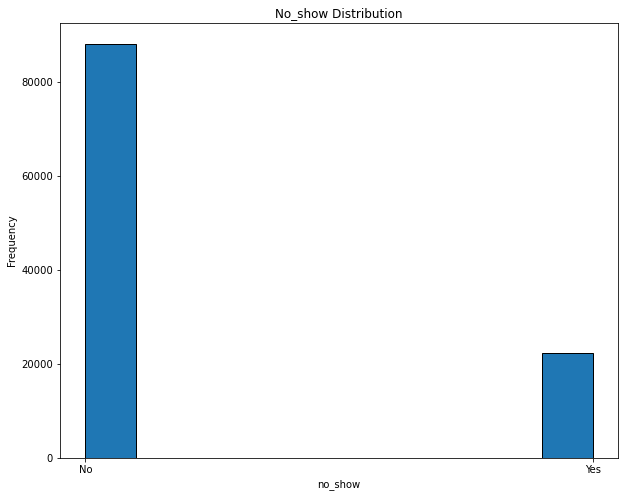

In [173]:
# plotting the distribution of no-show appointment 
# plotting the age distribution
fig, axes = plt.subplots(figsize =(10, 8))
axes.hist(data["no_show"], edgecolor = "black")

axes.set_title("No_show Distribution")

axes.set_xlabel("no_show")
axes.set_ylabel("Frequency")


plt.show()

>The number of people actually showing up to the appointments is much higher

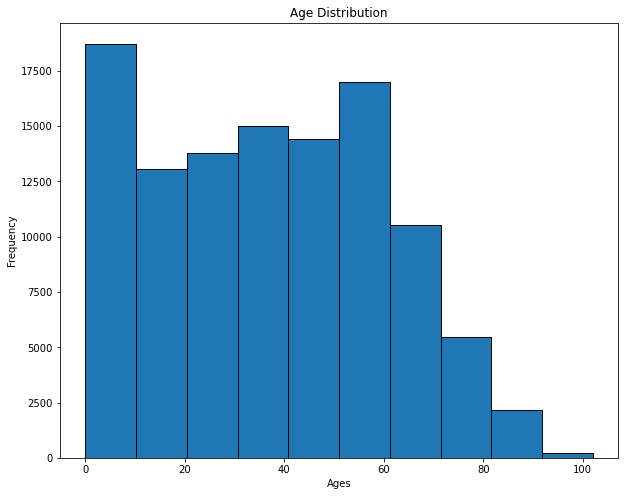

In [174]:
# plotting the age distribution
fig, axes = plt.subplots(figsize =(10, 8))
axes.hist(data["Age"], edgecolor = "black")

axes.set_title("Age Distribution")

axes.set_xlabel("Ages")
axes.set_ylabel("Frequency")


plt.show()

>Most patients are between 0 to 15 years old in this dataset

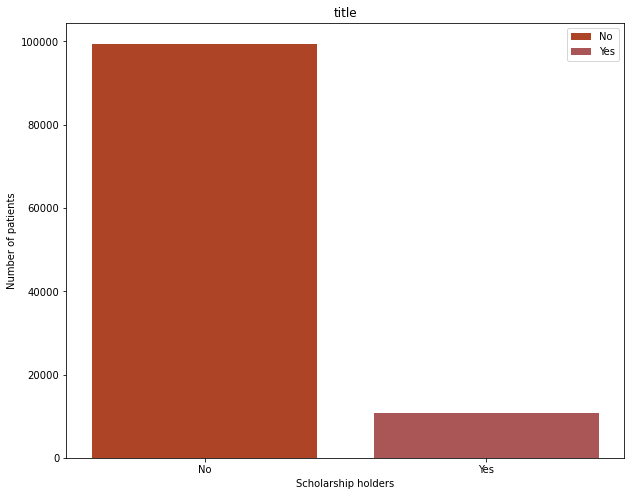

In [175]:
# plotting the distribution of scholarship holders with a bar graph
barPlot("No", "Yes", data["Scholarship"].value_counts()[0], data["Scholarship"].value_counts()[1], "No", "Yes", 
xlabel="Scholarship holders", ylabel="Number of patients")

>The majority of the people in this dataset don't hold scholarships

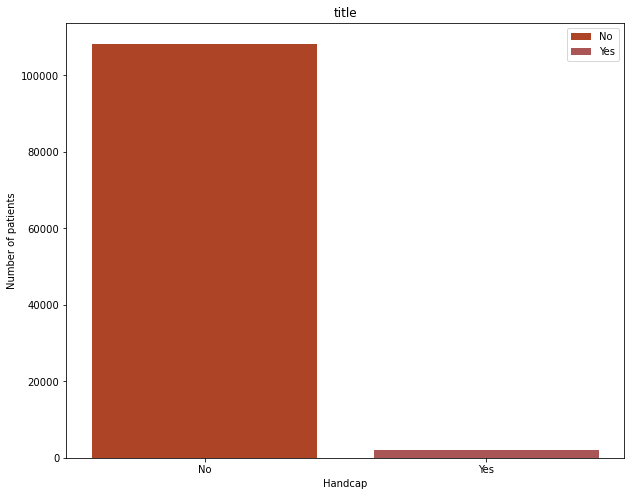

In [176]:
#plotting the distribution of handcap people
barPlot("No", "Yes", data["Handcap"].value_counts()[0], data["Handcap"].value_counts()[1], label1 ="No", label2="Yes" ,
xlabel= "Handcap", ylabel="Number of patients")

> The majority of the people aren't handcap

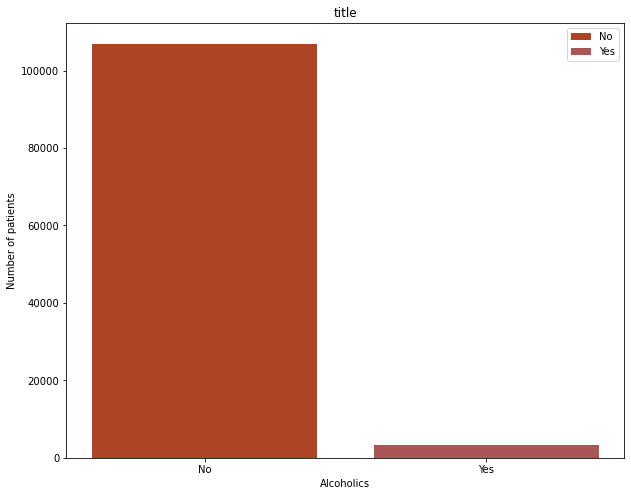

In [177]:
barPlot("No", "Yes", data["Alcoholism"].value_counts()[0], data["Alcoholism"].value_counts()[1], label1 ="No", label2="Yes" ,
xlabel= "Alcoholics", ylabel="Number of patients")

>The majority of the people aren't alcoholics

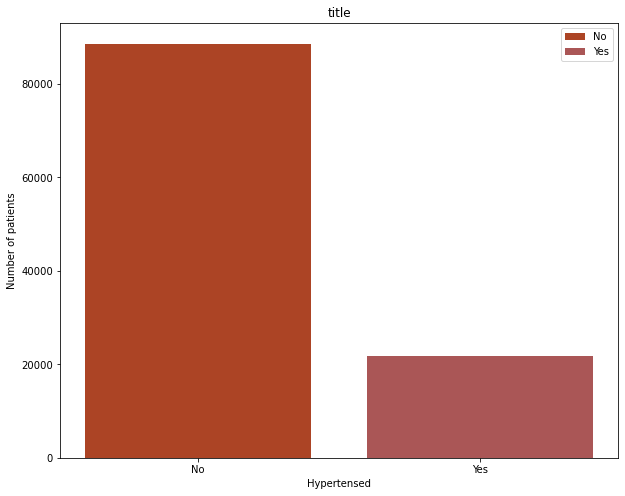

In [178]:
barPlot("No", "Yes", data["Hipertension"].value_counts()[0], data["Hipertension"].value_counts()[1], label1 ="No", label2="Yes" ,
xlabel= "Hypertensed", ylabel="Number of patients")

>The majority of the people are not suffering from high blood pressure

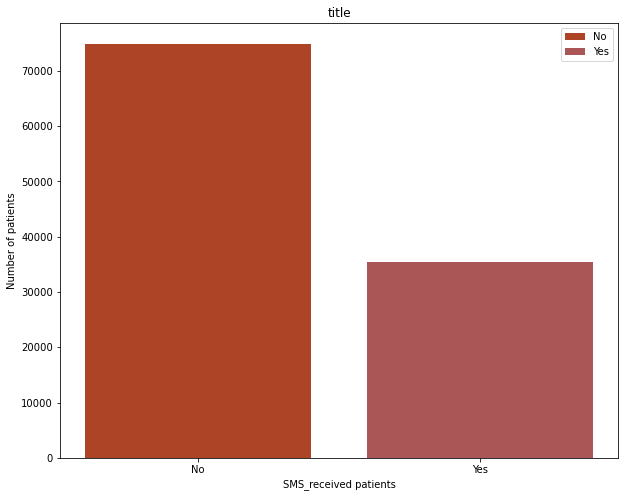

In [179]:
barPlot("No", "Yes", data["SMS_received"].value_counts()[0], data["SMS_received"].value_counts()[1], label1 ="No", label2="Yes" ,
xlabel= "SMS_received patients", ylabel="Number of patients")

>The majority of the people didn't receive sms messages prior to the appointment

<a id='eda'></a>
## Exploratory Data Analysis

Questions to explore:
1. What factors contribute to the prediction of a patient's attendance? (Gender, Diabetes, Handcap, Hypertension & Alcholism)
2. In what way does age play into these rates?
3. Will the presence of alerts such as an sms make people more likely to show up?
4. Are people from certain neigbourhoods more likely to show up?
5. Are scholarship holders less likely to miss their appointments?
6. Will patients be more encouraged to show up if their appointment day is on the same day as the schedule day? 

<a id = 'q1'></a>
##### Research Question 1:  (What factors contribute to the prediction of the patient's attendance? (Gender, Diabetes, Handcap, Hypertension, Alcholism) </a>

###### **Plotting the relationship between Gender and no-show appointments**

In [180]:
#getting the number of females & males who showed up
all_females = data.query('Gender == "F"')
all_males = data.query('Gender == "M"')

females_showed = len(all_females.query('no_show == "No"'))
males_showed = len(all_males.query('no_show == "No"'))

females_missed = len(all_females.query('no_show == "Yes"'))
males_missed = len(all_males.query('no_show == "Yes"'))

all_females = len(all_females)
all_males = len(all_males)


In [181]:
# getting the proportions of each gender in respect to their separate total smaple
# because the gap between them is wide, hence it wouldn't be a fair comparison

females_showed = females_showed/all_females
males_showed = males_showed/all_males

females_missed = females_missed/all_females
males_missed = males_missed/all_males

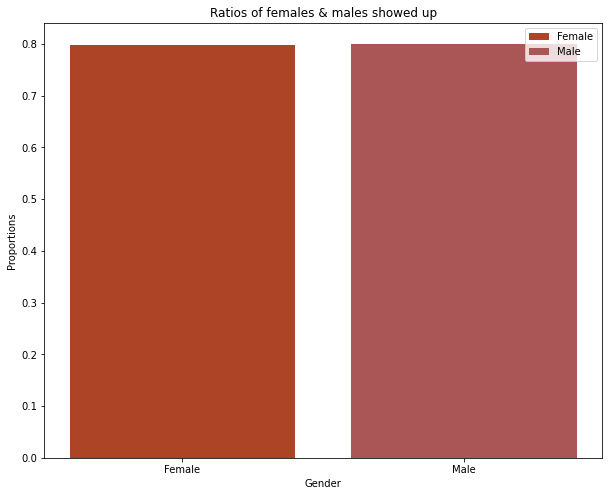

In [182]:
barPlot('Female', 'Male', females_showed, males_showed, 
"Female", "Male", "Ratios of females & males showed up", "Gender", "Proportions")

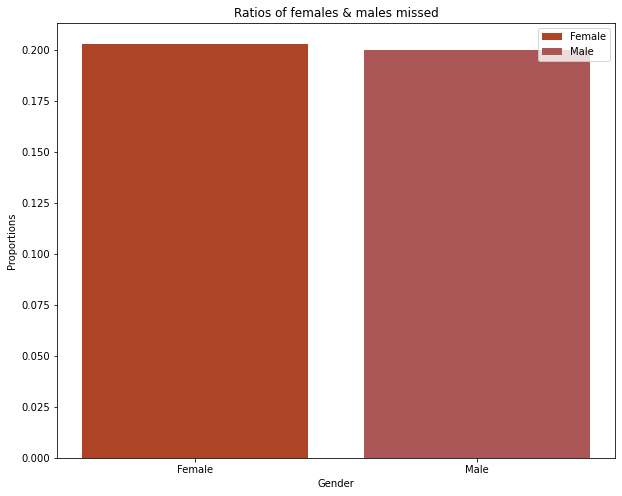

In [183]:
barPlot('Female', 'Male', females_missed, males_missed, "Female", "Male", "Ratios of females & males missed", "Gender", "Proportions")

> According to the graphs, there's no significant effect that a gender might have on an appointment's dismissal <br> So it's safe to say that gender is not a facor <br>
>The statistics provided (according to the earlier calulations): 
- Almost 20% of females missed their appointments
- Almost 20% of males also missed their appointments

###### **Plotting the relationship between Diabetes and no-show appointments**

In [184]:
# getting the total number of patients with diabetes
total_diabetes = data.query('Diabetes == 1')
total_diabetes

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
4,F,2016-04-29,2016-04-29,56,Jardim da penha,0,1,1,0,0,0,No
36,F,2016-04-29,2016-04-29,63,São cristóvão,0,1,1,0,0,0,No
37,F,2016-04-29,2016-04-29,64,Tabuazeiro,1,1,1,0,0,0,No
41,F,2016-04-28,2016-04-29,71,Maruípe,0,0,1,0,0,0,No
44,F,2016-04-28,2016-04-29,78,São cristóvão,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110448,F,2016-06-01,2016-06-06,40,Resistência,0,1,1,0,0,1,No
110456,F,2016-06-03,2016-06-03,79,Resistência,0,1,1,0,0,0,No
110468,F,2016-06-02,2016-06-07,76,Resistência,0,1,1,0,0,1,No
110477,F,2016-05-09,2016-06-06,67,Resistência,0,0,1,0,0,1,No


In [185]:
#getting the numbers of who missed and who didn't
diabetes_showed = len(total_diabetes.query('no_show == "No"'))
diabetes_missed = len(total_diabetes.query('no_show == "Yes"'))

In [186]:
#calculating proportions
diabetes_showed = diabetes_showed/len(total_diabetes)
diabetes_missed = diabetes_missed/len(total_diabetes)

print(diabetes_missed*100)
print(diabetes_showed*100)

18.0
82.0


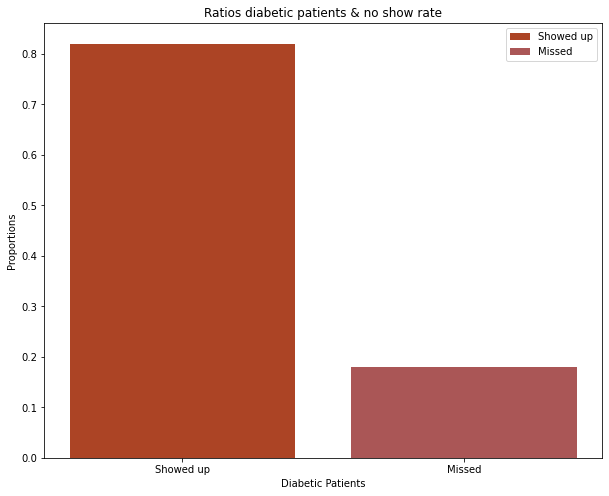

In [187]:
barPlot('Showed up', 'Missed', diabetes_showed, diabetes_missed, 'Showed up', 'Missed', "Ratios diabetic patients & no show rate", 
"Diabetic Patients", "Proportions")

> The number of diabetic patients who showed up is much larger
- Only 18% of diabetic patients didnt show up

###### **Plotting the relationship between Alcoholism and no-show appointments**

In [188]:
#getting the total number of patients with alcohol issues
total_alcoholics = data.query('Alcoholism == 1')
total_alcoholics

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
46,M,2016-04-25,2016-04-29,58,São cristóvão,0,1,0,1,0,1,No
131,M,2016-04-28,2016-04-29,29,Praia do suá,0,0,0,1,0,0,Yes
133,M,2016-04-14,2016-04-29,69,Praia do suá,0,0,1,1,0,0,No
186,M,2016-04-15,2016-04-29,66,Redenção,0,1,0,1,0,0,No
207,M,2016-04-29,2016-04-29,46,Maruípe,0,0,0,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110071,M,2016-06-01,2016-06-06,54,Bonfim,0,1,0,1,0,1,No
110167,M,2016-06-01,2016-06-03,64,Boa vista,0,0,0,1,0,0,No
110168,M,2016-06-01,2016-06-03,50,Santo antônio,0,1,1,1,0,0,Yes
110174,M,2016-05-30,2016-06-02,59,São benedito,0,1,0,1,0,1,No


In [189]:
#getting the numbers of who missed and who didn't
alcoholics_showed = len(total_alcoholics.query('no_show == "No"'))
alcoholics_missed = len(total_alcoholics.query('no_show == "Yes"'))

In [190]:
#calculating proportions
alcoholics_showed = alcoholics_showed/len(total_alcoholics)
alcoholics_missed = alcoholics_missed/len(total_alcoholics)

print(alcoholics_missed*100)
print(alcoholics_showed*100)

20.13723150357995
79.86276849642005


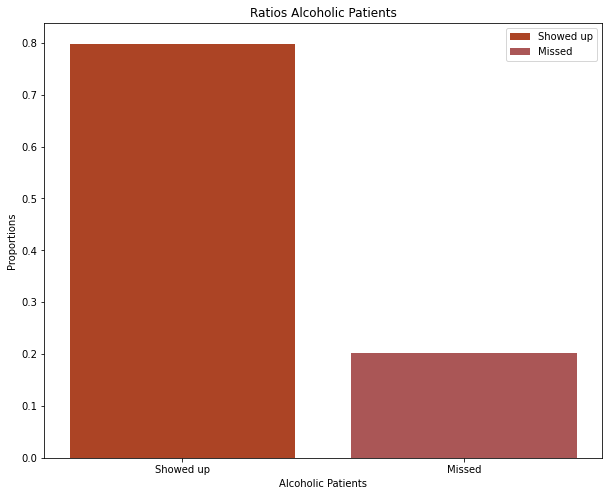

In [191]:
barPlot('Showed up', 'Missed', alcoholics_showed, alcoholics_missed, 'Showed up', 'Missed', "Ratios Alcoholic Patients", 
"Alcoholic Patients", "Proportions")

###### **Plotting the relationship between Handicap and no-show appointments**

In [192]:
total_handcap = data.query('Handcap == 1')
total_handcap

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
147,F,2016-04-29,2016-04-29,65,Universitário,0,1,0,0,1,0,No
189,F,2016-04-29,2016-04-29,77,Conquista,0,1,0,0,1,0,No
190,M,2016-04-29,2016-04-29,81,Conquista,0,0,0,0,1,0,No
199,M,2016-04-29,2016-04-29,62,Parque moscoso,0,1,1,0,1,0,No
211,F,2016-04-27,2016-04-29,56,Maruípe,0,1,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110202,F,2016-06-03,2016-06-07,91,Cruzamento,0,0,0,0,1,1,Yes
110421,F,2016-06-02,2016-06-02,34,Resistência,0,0,0,0,1,0,No
110436,M,2016-06-07,2016-06-07,21,Resistência,0,0,0,0,1,0,No
110439,F,2016-06-07,2016-06-07,34,Resistência,0,0,0,0,1,0,No


In [193]:
handcap_showed = len(total_handcap.query('no_show == "No"'))
handcap_missed = len(total_handcap.query('no_show == "Yes"'))

In [194]:
handcap_showed = handcap_showed/len(total_handcap)
handcap_missed = handcap_missed/len(total_handcap)

print(handcap_missed*100)
print(handcap_showed*100)

17.730844793713164
82.26915520628684


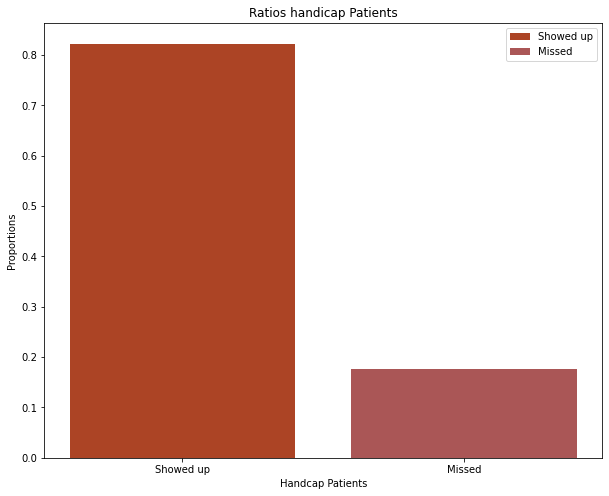

In [195]:
barPlot('Showed up', 'Missed', handcap_showed, handcap_missed, 'Showed up', 'Missed', "Ratios handicap Patients", 
"Handcap Patients", "Proportions")

> Handicap patients are much more likely to show up to their appointment
- only 17% miss their appointments

In [196]:
#getting the total number of patients with alcohol issues
total_hyptertension = data.query('Hipertension == 1')
total_hyptertension

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29,2016-04-29,62,Jardim da penha,0,1,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,Jardim da penha,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,76,República,0,1,0,0,0,0,No
25,M,2016-04-26,2016-04-29,46,Conquista,0,1,0,0,0,1,No
26,F,2016-04-29,2016-04-29,45,Bento ferreira,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110483,F,2016-06-03,2016-06-03,60,Praia do canto,0,1,0,0,0,0,No
110492,M,2016-06-08,2016-06-08,33,Maria ortiz,0,1,0,0,0,0,Yes
110496,F,2016-06-06,2016-06-08,37,Maria ortiz,0,1,0,0,0,0,Yes
110499,F,2016-06-01,2016-06-01,66,Maria ortiz,0,1,1,0,0,0,No


In [197]:
hyptertension_showed = len(total_hyptertension.query('no_show == "No"'))
hyptertension_missed = len(total_hyptertension.query('no_show == "Yes"'))

In [198]:
hyptertension_showed = hyptertension_showed/len(total_hyptertension)
hyptertension_missed = hyptertension_missed/len(total_hyptertension)

print(hyptertension_missed*100)
print(hyptertension_showed*100)

17.259958553994935
82.74004144600507


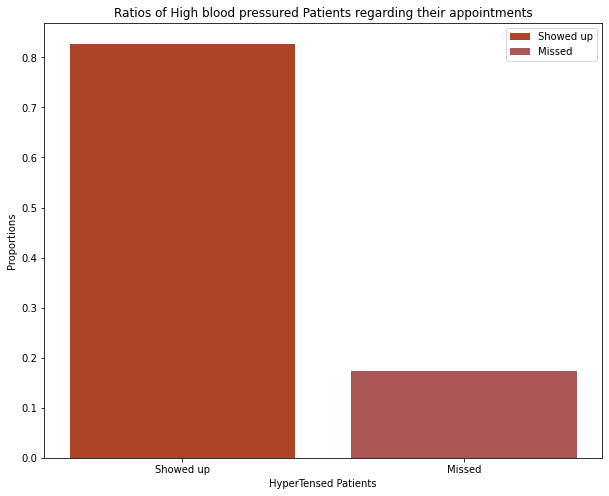

In [199]:
barPlot('Showed up', 'Missed', hyptertension_showed, hyptertension_missed, 'Showed up', 'Missed', 
"Ratios of High blood pressured Patients regarding their appointments", 
"HyperTensed Patients", "Proportions")

> High blood pressured patients are much more likely to show up to their appointment
- only 17% miss their appointments

<a id = "q2"></a>
### Research Question 2  (In what way does age play into these rates?)

###### plot a line graph to show the rates of no-showing for different ages

In [200]:
# a new dataset with some tweaks on the nos_show column 
data2 = copy.copy(data)
data2['no_show'].replace({'No': 0, 'Yes': 1}, inplace=True)

# NoShow type change
data2['no_show'] = data2['no_show'].astype('bool')

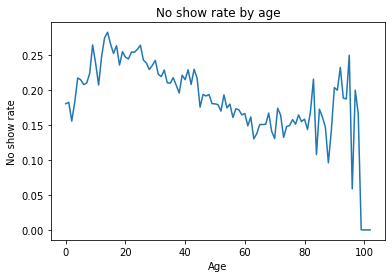

In [201]:
y_means = data2['no_show'].groupby(data['Age']).mean()

x_age = data['Age'].unique()
x_age = sorted(x_age)

plt.errorbar(x = x_age, y = y_means)

plt.title('No show rate by age')

plt.xlabel('Age')

plt.ylabel('No show rate')

plt.show()

> We can see that younger people (aged 16 to 25) have the highest rates of not showing up to appointments

<a id = "q3"></a>
### Research Question 3  (Will the presence of alerts such as an sms make people more likely to show up??)

In [202]:
data["SMS_received"].value_counts()

0    74883
1    35434
Name: SMS_received, dtype: int64

In [203]:
recieved_showed = len(data.query('no_show == "No" & SMS_received == 1'))
recieved_missed = len(data.query('no_show == "Yes" & SMS_received == 1'))

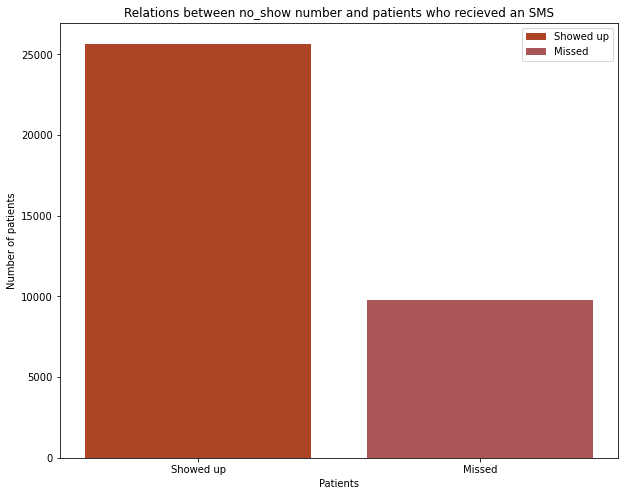

In [204]:
barPlot('Showed up', 'Missed', recieved_showed, recieved_missed, 'Showed up', 'Missed', "Relations between no_show number and patients who recieved an SMS", 
"Patients", "Number of patients")

> People who have recieved an sms are more likely to show up

<a id = "q4"></a>
### Research Question 4  (Are people from certain neigbourhoods more likely to show up?)

In [205]:
#filtering onlt those who didn't show up
data2 = data2[data2["no_show"] == True]

In [206]:
group = data2.groupby(["Neighbourhood"])["no_show"].count()
group

Neighbourhood
Aeroporto                1
Andorinhas             517
Antônio honório         50
Ariovaldo favalessa     62
Barro vermelho          91
                      ... 
São josé               426
São pedro              512
Tabuazeiro             572
Universitário           32
Vila rubim             141
Name: no_show, Length: 80, dtype: int64

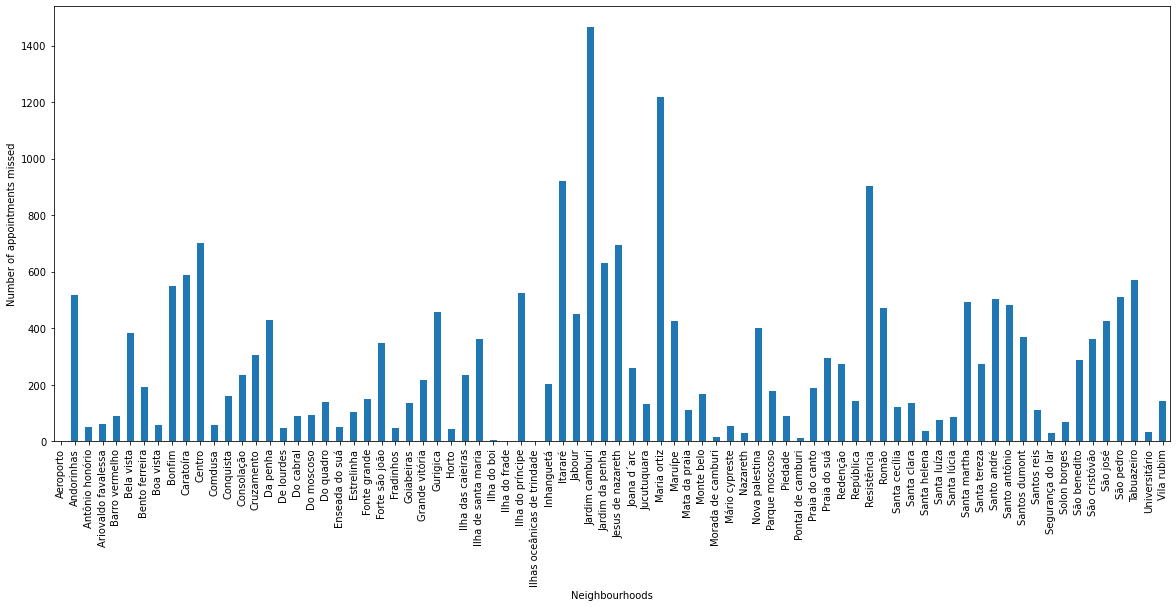

In [207]:
group.plot(kind='bar', figsize=(20,8))
plt.xlabel("Neighbourhoods")
plt.ylabel("Number of appointments missed")

plt.show()

> Jardim Cabmuri seems to have the highest rates of patients not showing up. This maybe because it's the most populous neighbourhood in Espirito Santo state.However, It's hard to tell what factors contribute to these numbers as not enough information is provided  

<a id = "q5"></a>
### Research Question 5  (Are scholarship holders less likely to miss their appointments?)

In [208]:
total_scholarships = data.query('Scholarship == 1')
total_scholarships

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
12,F,2016-04-28,2016-04-29,22,Nova palestina,1,0,0,0,0,0,No
17,F,2016-04-28,2016-04-29,40,Conquista,1,0,0,0,0,0,Yes
18,F,2016-04-26,2016-04-29,30,Nova palestina,1,0,0,0,0,1,No
31,M,2016-04-27,2016-04-29,12,Nova palestina,1,0,0,0,0,0,Yes
33,F,2016-04-25,2016-04-29,38,São cristóvão,1,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110423,F,2016-05-16,2016-06-08,34,Resistência,1,0,0,0,0,1,No
110426,M,2016-05-25,2016-06-08,13,Resistência,1,0,0,0,0,1,No
110473,M,2016-06-07,2016-06-07,2,Nova palestina,1,0,0,0,0,0,No
110479,F,2016-04-29,2016-06-06,34,Resistência,1,0,0,0,0,1,Yes


In [209]:
scholarship_missed = len(total_scholarships.query('no_show == "Yes"'))
scholarship_showed = len(total_scholarships.query('no_show == "No"'))
scholarship_showed

8266

In [210]:
# calculating proportions

scholarship_missed = scholarship_missed/len(total_scholarships)
scholarship_showed = scholarship_showed/len(total_scholarships)

print(scholarship_missed*100)
print(scholarship_showed*100)

23.76648529004888
76.23351470995112


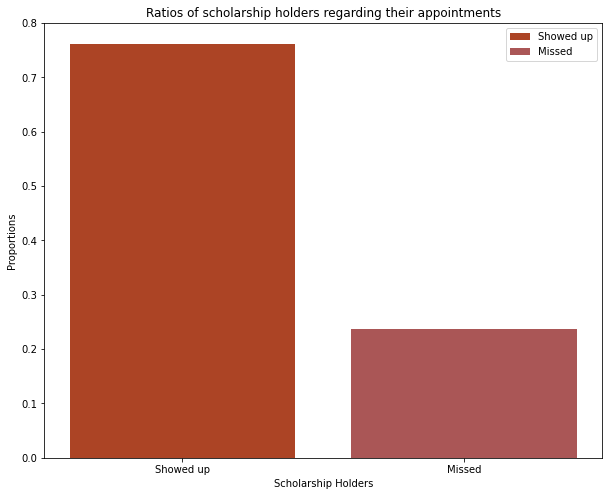

In [211]:
barPlot('Showed up', 'Missed', scholarship_showed, scholarship_missed, 'Showed up', 'Missed', "Ratios of scholarship holders regarding their appointments", 
"Scholarship Holders", "Proportions")

> Scholarship holders are more likely to show up to their appointments
- only 23% miss their appointments

<a id = "q6"></a>
### Research Question 6  (Will patients be more encouraged to show up if their appointment day is on the same day as the schedule day?)

In [212]:
# adding a new column to calculate the number of day a patient waited before the appointment

data["waiting_days"] = (data["AppointmentDay"] - data["ScheduledDay"]).dt.days

data2 = copy.copy(data)
data2['no_show'].replace({'No': 0, 'Yes': 1}, inplace=True)

# NoShow type change
data2['no_show'] = data2['no_show'].astype('bool')

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110317 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110317 non-null  object
 1   ScheduledDay    110317 non-null  object
 2   AppointmentDay  110317 non-null  object
 3   Age             110317 non-null  int64 
 4   Neighbourhood   110317 non-null  object
 5   Scholarship     110317 non-null  int64 
 6   Hipertension    110317 non-null  int64 
 7   Diabetes        110317 non-null  int64 
 8   Alcoholism      110317 non-null  int64 
 9   Handcap         110317 non-null  int64 
 10  SMS_received    110317 non-null  int64 
 11  no_show         110317 non-null  object
 12  waiting_days    110317 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


In [214]:
dates = data["waiting_days"]
dates

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: waiting_days, Length: 110317, dtype: int64

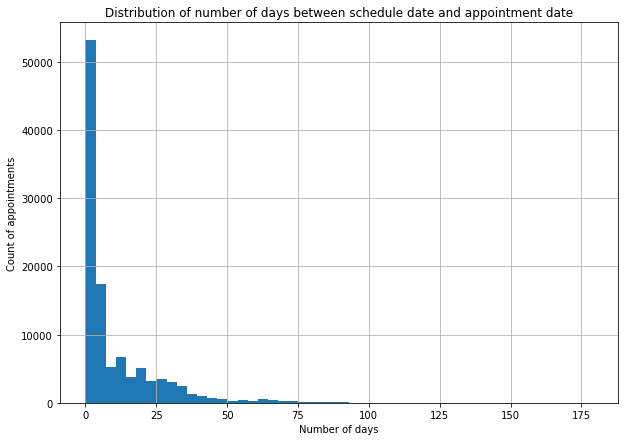

In [215]:
#plotting the relation
dates.hist(bins=50, figsize=(10,7))
plt.xlabel('Number of days')
plt.ylabel('Count of appointments')
plt.title('Distribution of number of days between schedule date and appointment date')

plt.show()

> It seems that most of the appointements are scheduled on the same day as the appointment itself
<br> So does that encourage people to show up? I'd argue no but we'll explore this

In [216]:
# no row has a difference less than 0
len(data.query("waiting_days < 0"))

0

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


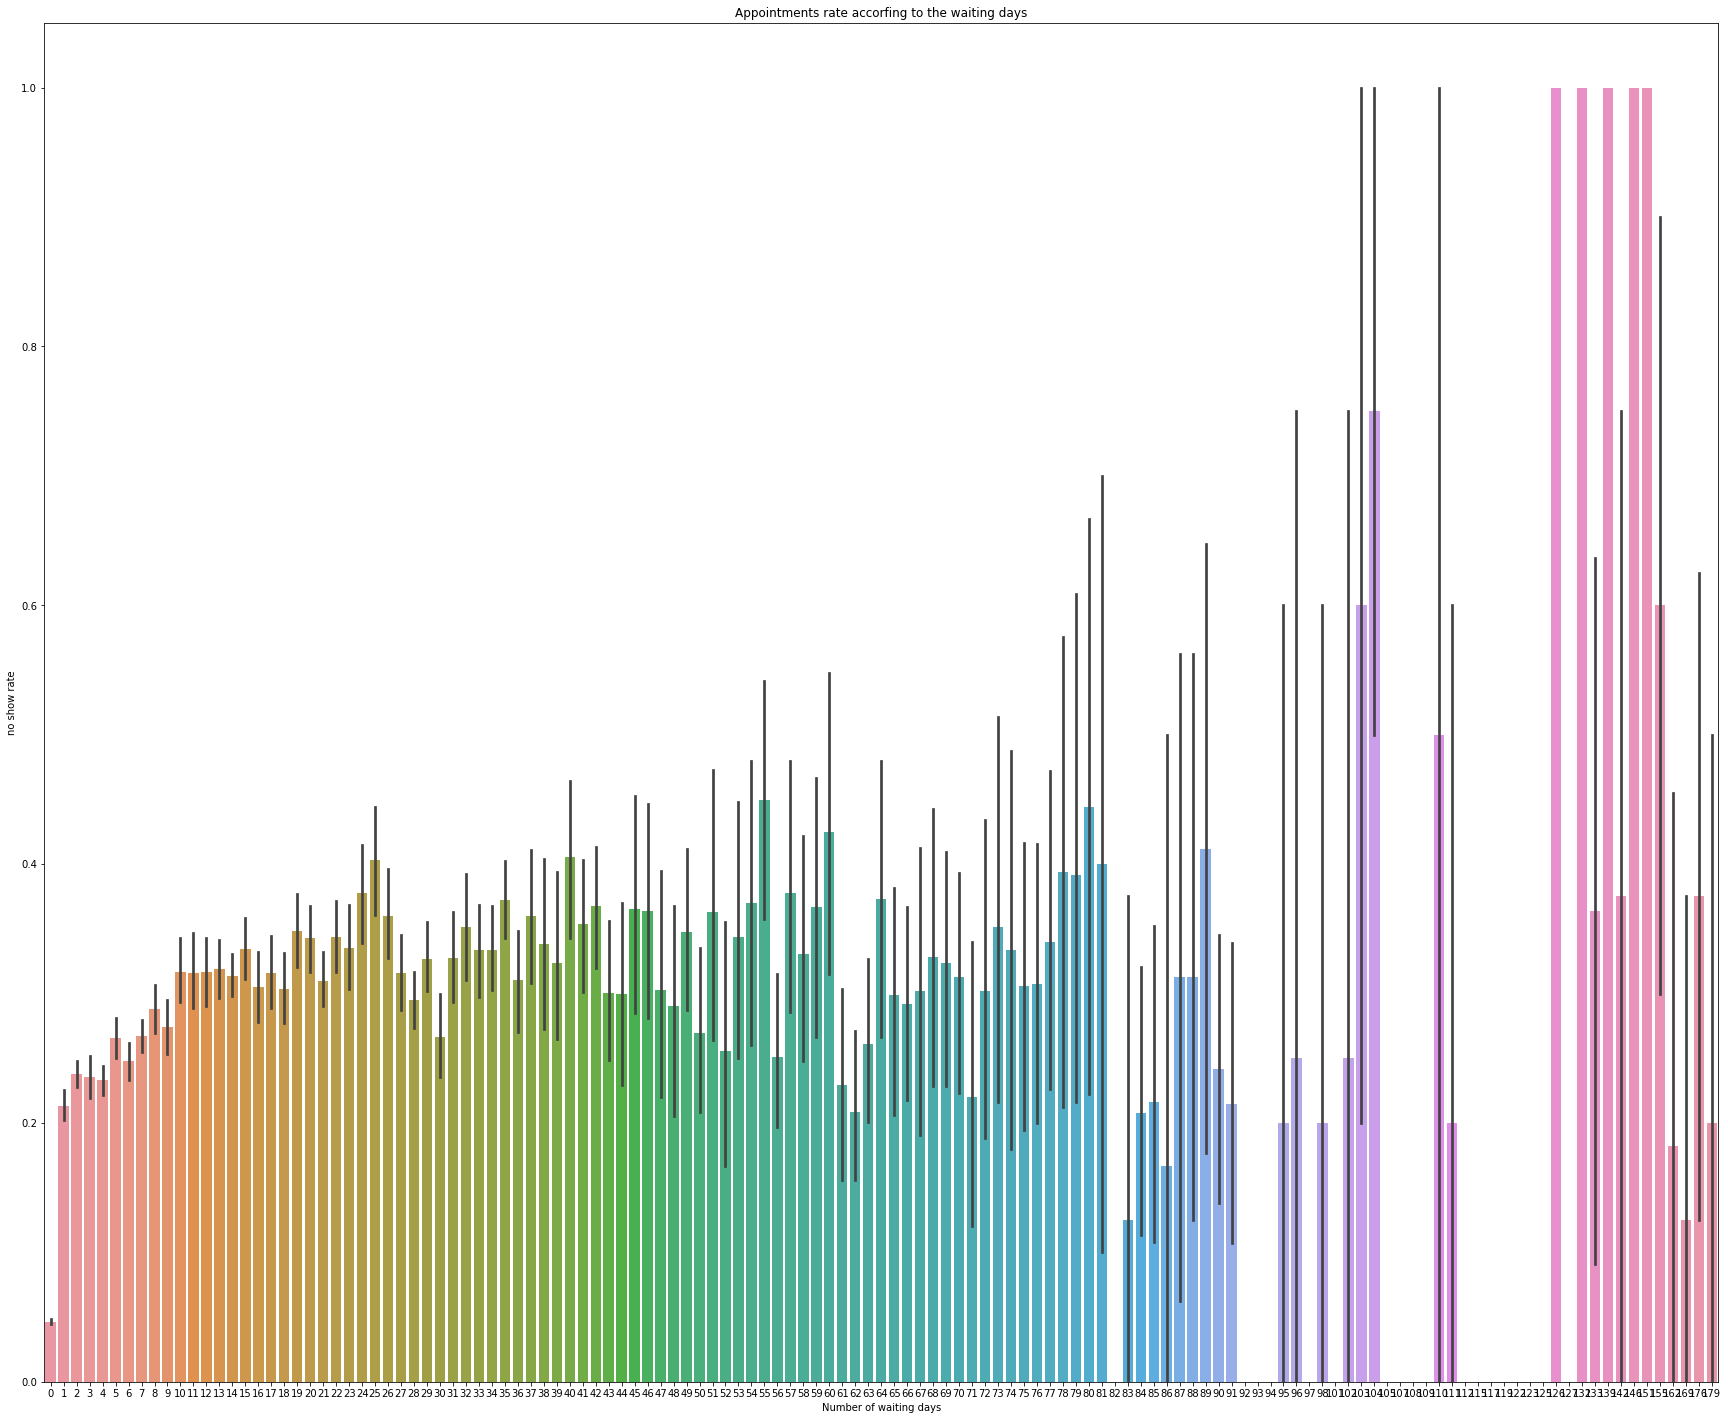

In [217]:
plt.figure(figsize=(30,25))
p = sns.barplot(data2["waiting_days"], data2["no_show"], errwidth = None, palette = None)
p.set(xlabel = 'Number of waiting days', ylabel = "no show rate", title = "Appointments rate accorfing to the waiting days")

plt.show()

> The rate of not showing up increase as we, for the most part, increase the waiting days
<br> As shown, the lowest rates are from 0 to 3 waiting days

<a id='conclusions'></a>
## Conclusions

**This dataset presents 100k medical appointment for patients in different neighbourhoods in Brazil. Our analysis was based on the question as to why 30% of patients miss their appointments** <br>

**Our data variables**:
1. PatientId: Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
5. DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False . Observation: this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: True or False
14. No-show: True or False (true -> patient didnt show up, false -> patient showed up)

**Observations**

<li> Females take about 65% of this dataset, meaning they have more medical records than men, hence, they take care of their healths more </li>
<li> The highest number of patients recorded were between 0 & 15 years old</li>
<li> The second highest number recorded were between 50 & 60 years old. That makes sense as the youngest and eldery are more suciptable to sicknesses. So it's predictable to find many records for them</li>
<li>The majority of people don't hold scholarships</li>
<li>The majority of people aren't handcap</li>
<li>The mojority of people aren't alcoholics nor diabetic</li>
<li>The majority of people didn't receive sms messages for their next appointment</li>
<li>The majority of people don't suffer from high blood pressure</li>

**Conclusion based on EDA questions**

Factors that contribute to the no-show rating are:
    <li>Hipertension</li>
    <li>Alcoholism</li>
    <li>Diabetes</li>
    <li>Handcap or disablities</li>

All in all, Patients who have chronic diseases such as diabetes or suffer disabilites or addiction issues will care greatly for attending their appointments <br>
- Gender, on the other hand, doesn't affect the ratings. Based on our visualizations, the number of females not showing up is almost the same as that of the males. So it's safe to say that gender play no role in the no-show ratings <br>

**Statistics:**
- Almost 80% of females show up to their appointments
- Almost 77% of males show up to their appointments 
- 82% of diabetic patients show up as regular chech-ups are vital
- 79% of alcoholics show up to their appointments
- 83% of handcap patients show up
- 82% of patients with high blood pressure show up to their appointments

One of the question asked was how much age can affect these rating. We found that, patients between 15 & 20 years old record the highest rates of missing their appointments. And the lowest were for patients between 80 & 90. <br>
Eledery people have weak immunities and are much weaker, it's not surprising that they ensure showing up to their appointments 

According to the dataset, clinics/hospitals sometimes send their patients an sms to alert them regarding their upcoming appointments. <br>
It's found that people who receive an sms are more likely to show up to their appointment<br>
However, only 35434 out of 110317 sms messages were sent to patients. No doubt, this affected the now show rating  

In this dataset, there're many neighbourhoods recorded. Although there wasn't enough information about them and some might find them irrelevant, i was able to come up with simple findings. <br>
- The highest number of no-show rating recorded are in Jardim Camburi. This is the most popoulous neighbourhood in Espirito santo, so it's possible that more cases are recorded because of this
- Ihas oceanicas de trindade had the lowest numbers, close to non-existent. Its good to note that it's a relatively remote place

It's also found that scholarship holders are much more likely to show up. One of the reasone be that the medical bills are state-funded in this case
- 77% scholarship holders show up in this case 

Now it is found that most schedule calls are made on the same day as the appointment itself. And that might be a problem with many people as they're put on the spot. According to my findings, more than 50000 appointments are made on the same day as the appointment day. The highest no-rate is approximately (0.15), and it's attributed to calls made on the appointment's day  

/////////////////////////////////////////////////////////////////////////

Data Wrangling Process

- Deleting negative values of Age
- change time-stamps from object to date-time objects
- Dropped patient id & appointment number columns
- Removed outliers in Age column
- Checked for duplicates
- checked for missing data
- Capitalized neighbourhoods
- Made simple observations with different variables

Limitations
- Having the times of appointment dates would've helped in making a more accurate analysis
- Some records were scheduled after the appointment dates